# Overfitting

1. Nous allons génèrer des données et les sépare selon un **train set** et un **test set**.
2. Nous allons ensuite entraîner plusieurs **modèles polynomiaux** de différents degrés et mesurer leurs **erreurs (erreur quadrratique moyenne, MSE)** respectives sur le train set et sur le test set.
3. La relation entre la complexité du modèle et leurs erreurs respective permet de comprendre le concept d'**overfitting**.

## Librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Create dataset

Le code suivant permet de générer des **data bruitées** selon la fonction

$$
f(x) = 3x^3 - 2x^2 + 7x + 13 + \epsilon
$$

où $\epsilon$ est un bruit normal (gaussien) de mooyenne $\mu = 0$ et déviation stadard $\sigma = 500$.

In [2]:
def f(x):
    
    return 3*x**3 - 2*x**2 + 7*x + 13

In [3]:
X = np.random.uniform(-10, 10, size=(300))
y = f(X) + np.random.normal(0, 500, size=(300))

Splittez vos data en un **train set (80%)** et un **test set (20%)**.
- Le **train set** est utilisé pour **entraîner** les modèles.
- Le **train set** est utilisé pour **évaluer** la performance des modèles.

Utiliser la fonction `train_test_split(...)`:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
X_test.shape

(60,)

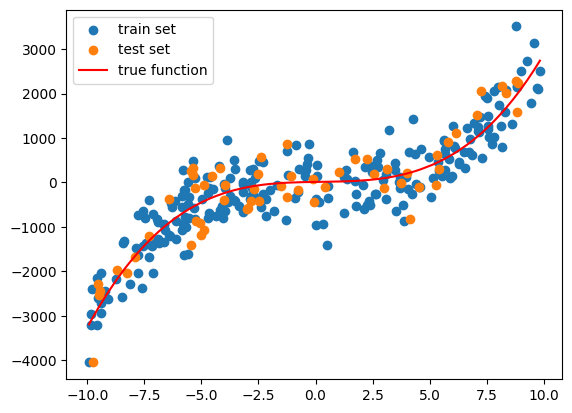

In [6]:
plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")
xtraintemp = np.sort(X_train.copy())

plt.plot(xtraintemp, f(xtraintemp), color="red", label="true function")

plt.legend()

## Models

### Linear regression

Entraînez (fittez) une **régression linéaire** (`LinearRegression`) sur votre **train set** et évaluez votre modèle sur le **test set**.

L'entraînement d'un modèle comprend toujours les $4$ étapes suivantes:
1. **Instanciation:** création du modèle.
2. **Entraînement:**  entraîner (fitter) le modèle sur le **train set** (méthode `fit`).
3. **Prédictions:** prédire les données du **test set** (et du **train set** également, si besoin) (méthode `predict`).
4. **Résultats:** calculer l'erreur quadratique moyenne (`mean_squared_error`) de votre modèle sur le **test set** (et sur le **train set** également, si besoin).

Référez-vous à la documentation de la **régression linéaire** (`LinearRegression`) et de l'erreur quadratique moyenne (`mean_squared_error`) pour plus de précisions:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [7]:
reg_lin = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

y_test_pred = reg_lin.predict(X_test.reshape(-1, 1))
y_train_pred = reg_lin.predict(X_train.reshape(-1, 1))

mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)

(480117.65157909406, 429174.35336372565)

### Polynomial regressions

Entraînez (fittez) des **régressions polynomiales** (`PolynomialFeatures`) de degrés $1$ à $10$ sur votre **train set** et évaluez vos modèles sur le **test set**.

L'entraînement d'une **régression polynomiale** comprend les étapes suivante:
1. **Transformation des inputs:** transformation des inputs `X` en des inputs `X_poly` de degré suprérieur.
2. **Instanciation:** création d'une régression linéaire.
3. **Entraînement:**  entraîner (fitter) votre régression linéaire sur le **train set** avec les inputs transformées `X_poly` (méthode `fit`).
4. **Prédictions:** prédire les données du **test set** (et du **train set** également, si besoin) (méthode `predict`).
5. **Résultats:** calculer l'erreur quadratique moyenne (`mean_squared_error`) de votre modèle sur le **test set** (et sur le **train set** également, si besoin).

Référez-vous à la documentation de la **régressions polynomiale** (`PolynomialFeatures`) pour plus de précisions:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [8]:
reg_poly = PolynomialFeatures(3)

x_train_poly = reg_poly.fit_transform(X_train.reshape(-1, 1))

x_test_poly = reg_poly.transform(X_test.reshape(-1, 1))

reg_lin = LinearRegression().fit(x_train_poly, y_train)

y_test_pred = reg_lin.predict(x_test_poly)

mean_squared_error(y_test, y_test_pred)


221919.01117660248

Faites les graphe des **erreurs quadratiques moyennes (MSE)** sur le train set et sur le test set en fonction de la **complexité** polynomiale de votre modèle. 

Vous devriez faire apparaîtrre une petite situation d'**overfitting**. Quel est le meilleur modèle?